In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
pd.set_option('display.max_rows', 500)
pd.set_option('display.show_dimensions', True)
%matplotlib inline
plt.style.use('fivethirtyeight')

# Pima Indians Diabetes Database

In [2]:
# Load in the dataset
pima = pd.read_csv('/home/yungshun/workspace/py/sklearn-ml-feature-improvement/datasets/diabetes.csv')
# If missing column names
# pima_column_names = ['times_pregnant', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness', 'serum_insulin', 'bmi', 'pedigree_function', 'age', 'onset_diabetes']
# pima = pd.read_csv('/home/yungshun/workspace/py3/feature-improvement/datasets/diabetes.csv', names=pima_column_names)

In [3]:
pima.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.shape

(768, 9)

In [5]:
# Another method to check for missing values
pima.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
Length: 9, dtype: int64

In [6]:
# Get some basic descriptive statistics
pima.describe() 

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Qualitative data

In [7]:
# Get null accuracy, 65% did not develop diabetes
pima['onset_diabetes'].value_counts(normalize=True) 

0    0.651042
1    0.348958
Name: onset_diabetes, Length: 2, dtype: float64

### Quantitative data

In [8]:
# Numerical correlation matrix
# plasma_glucose_concentration definitely seems to be an interesting feature here
pima.corr()['onset_diabetes']

times_pregnant                  0.221898
plasma_glucose_concentration    0.466581
diastolic_blood_pressure        0.065068
triceps_thickness               0.074752
serum_insulin                   0.130548
bmi                             0.292695
pedigree_function               0.173844
age                             0.238356
onset_diabetes                  1.000000
Name: onset_diabetes, Length: 9, dtype: float64

<AxesSubplot: >

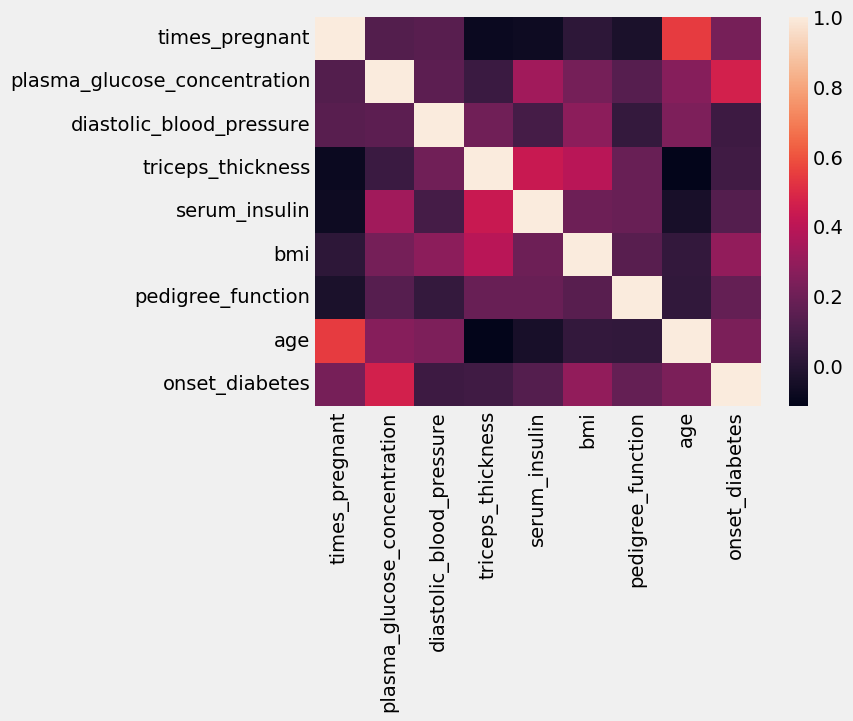

In [9]:
# Look at the heatmap of the correlation matrix of our dataset
sns.heatmap(pima.corr())

### Nominal level

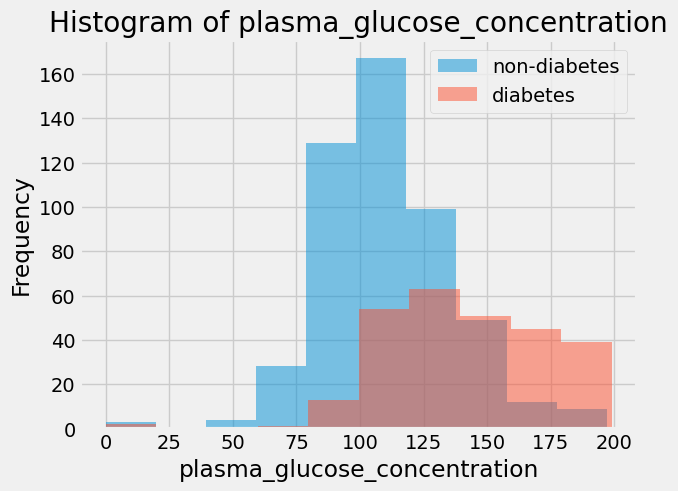

In [10]:
# Get a histogram of the plasma_glucose_concentration column for both classes
col = 'plasma_glucose_concentration'
plt.hist(pima[pima['onset_diabetes']==0][col], 10, alpha=0.5, label='non-diabetes')
plt.hist(pima[pima['onset_diabetes']==1][col], 10, alpha=0.5, label='diabetes')
plt.legend(loc='upper right')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.title('Histogram of {}'.format(col))
plt.show()

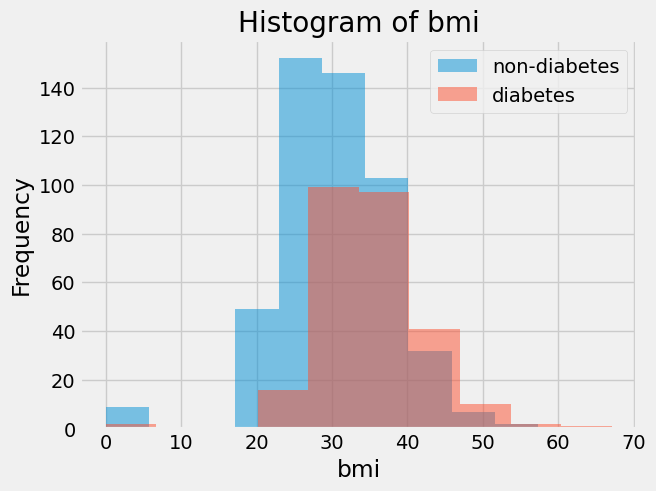

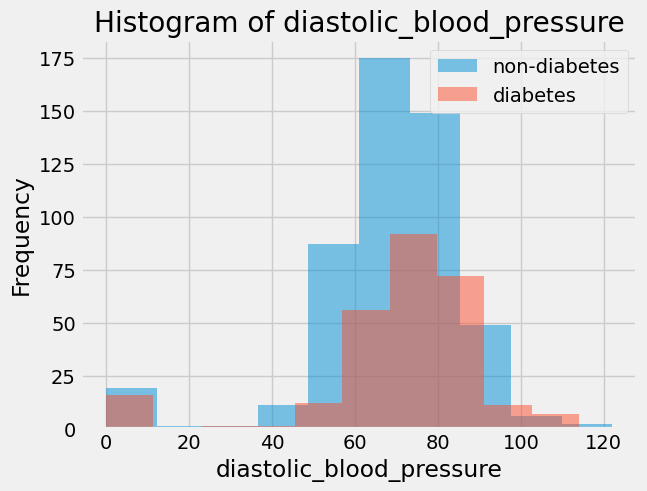

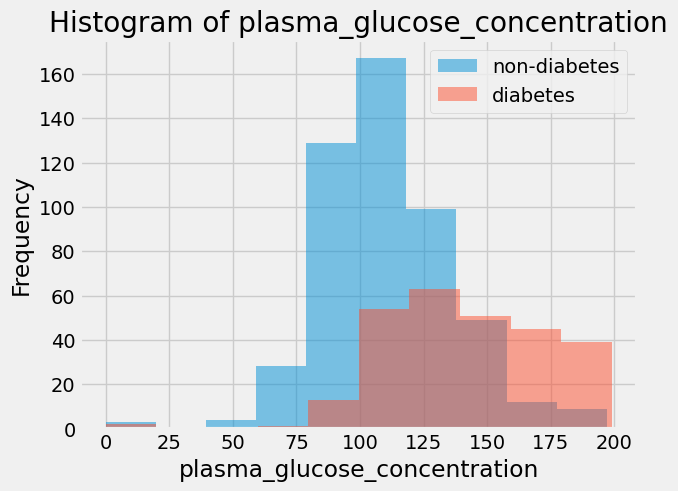

In [11]:
for col in ['bmi', 'diastolic_blood_pressure', 'plasma_glucose_concentration']:
    plt.hist(pima[pima['onset_diabetes']==0][col], 10, alpha=0.5, label='non-diabetes')
    plt.hist(pima[pima['onset_diabetes']==1][col], 10, alpha=0.5, label='diabetes')
    plt.legend(loc='upper right')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title('Histogram of {}'.format(col))
    plt.show()

## Impute the missing values in data

In [12]:
# Notice that the min value of bmi is 0. That is physically impossible. 
# Perhaps 0 has been encoded as a missing value instead of None

# We see that a 0 appears as a min for 
# times_pregnant
# plasma_glucose_concentration
# diastolic_blood_pressure
# triceps_thickness
# serum_insulin
# bmi
# onset_diabetes

# Because 0 is a class for onset_diabetes and 0 is a viable number for times_pregnant, we may conclude that 0 is encoding missing values for 
# plasma_glucose_concentration
# diastolic_blood_pressure
# triceps_thickness
# serum_insulin
# bmi
pima['serum_insulin'].isnull().sum()

0

In [13]:
pima['serum_insulin'] = pima['serum_insulin'].map(lambda x:x if x != 0 else None)

In [14]:
pima['serum_insulin'].isnull().sum()

374

In [15]:
# For all columns
for col in ['serum_insulin', 'bmi', 'plasma_glucose_concentration', 'diastolic_blood_pressure', 'triceps_thickness']:
    pima[col].replace([0], [None], inplace=True)

In [16]:
# This makes more sense now
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
Length: 9, dtype: int64

In [17]:
pima.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,NaN,33.6,0.627,50,1
1,1,85,66,29,NaN,26.6,0.351,31,0
2,8,183,64,None,NaN,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1


In [18]:
# Doesn't include columns with missing values
pima.describe()

,times_pregnant,serum_insulin,pedigree_function,age,onset_diabetes
count,768.000000,394.000000,768.000000,768.000000,768.000000
mean,3.845052,155.548223,0.471876,33.240885,0.348958
std,3.369578,118.775855,0.331329,11.760232,0.476951
min,0.000000,14.000000,0.078000,21.000000,0.000000
25%,1.000000,76.250000,0.243750,24.000000,0.000000
50%,3.000000,125.000000,0.372500,29.000000,0.000000
75%,6.000000,190.000000,0.626250,41.000000,1.000000
max,17.000000,846.000000,2.420000,81.000000,1.000000


### fillna()

In [19]:
pima['plasma_glucose_concentration'].mean(), pima['plasma_glucose_concentration'].std()

(121.6867627785059, 30.53564107280403)

In [20]:
empty_plasma_index = pima[pima['plasma_glucose_concentration'].isnull()].index
pima.loc[empty_plasma_index]['plasma_glucose_concentration']

75     None
182    None
342    None
349    None
502    None
Name: plasma_glucose_concentration, Length: 5, dtype: object

In [21]:
# Fill the column's missing values with the mean of the rest of the column
pima['plasma_glucose_concentration'].fillna(pima['plasma_glucose_concentration'].mean(), inplace=True)

In [22]:
pima.isnull().sum()

times_pregnant                    0
plasma_glucose_concentration      0
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
Length: 9, dtype: int64

In [23]:
pima.loc[empty_plasma_index]['plasma_glucose_concentration']

75     121.686763
182    121.686763
342    121.686763
349    121.686763
502    121.686763
Name: plasma_glucose_concentration, Length: 5, dtype: float64

### SimpleImputer()

`from sklearn.preprocessing import Imputer` was deprecated and removed. Now we use `from sklearn.impute import SimpleImputer` instead.

In [24]:
imputer = SimpleImputer(strategy='mean')

pima_imputed = imputer.fit_transform(pima)

In [25]:
# Comes out as an array
type(pima_imputed)

numpy.ndarray

In [26]:
pima_imputed = pd.DataFrame(pima_imputed, columns=pima.columns)

In [27]:
# Notice for example the triceps_thickness missing values were replaced with 29.15342
pima_imputed.head()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [28]:
# Same values as we obtained with fillna
pima_imputed.loc[empty_plasma_index]['plasma_glucose_concentration']

75     121.686763
182    121.686763
342    121.686763
349    121.686763
502    121.686763
Name: plasma_glucose_concentration, Length: 5, dtype: float64

In [29]:
# No missing values
pima_imputed.isnull().sum()

times_pregnant                  0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
Length: 9, dtype: int64

In [30]:
# Average vector length of imputed matrix
np.sqrt((pima_imputed**2).sum(axis=1)).mean()  

223.36222025823747

## Remove harmful rows of data

### dropna()

In [31]:
# Drop the rows with missing values
pima_dropped = pima.dropna()

In [32]:
# Lost over half of the rows
print("retained {}% of rows".format(round(100*(pima.shape[0] - pima_dropped.shape[0])/float(pima.shape[0]))))

retained 49% of rows


In [33]:
pima['onset_diabetes'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: onset_diabetes, Length: 2, dtype: float64

In [34]:
# The split of trues and falses stay relatively the same
pima_dropped['onset_diabetes'].value_counts(normalize=True)

0    0.669211
1    0.330789
Name: onset_diabetes, Length: 2, dtype: float64

In [35]:
# The mean values of each column (with missing values rows dropped)
pima_dropped.mean()

times_pregnant                    3.295165
plasma_glucose_concentration    122.625157
diastolic_blood_pressure         70.671756
triceps_thickness                29.122137
serum_insulin                   155.717557
bmi                              33.072519
pedigree_function                 0.522476
age                              30.839695
onset_diabetes                    0.330789
Length: 9, dtype: float64

In [36]:
# % change in means
(pima_dropped.mean() - pima.mean()) / pima.mean()

times_pregnant                 -0.143012
plasma_glucose_concentration    0.007712
diastolic_blood_pressure       -0.023941
triceps_thickness              -0.001073
serum_insulin                   0.001089
bmi                             0.018950
pedigree_function               0.107230
age                            -0.072236
onset_diabetes                 -0.052068
Length: 9, dtype: float64

Text(0, 0.5, '% change')

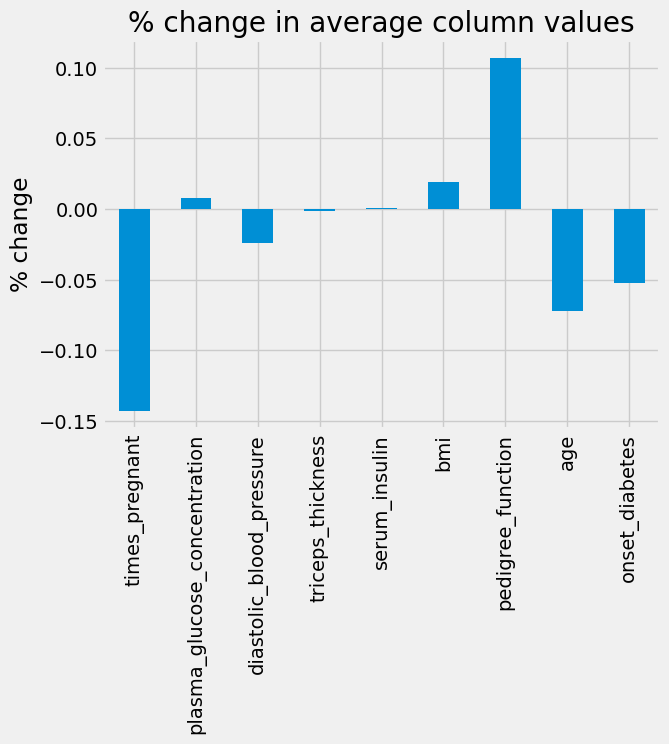

In [37]:
# % change in means as a bar chart
ax = ((pima_dropped.mean() - pima.mean()) / pima.mean()).plot(kind='bar', title='% change in average column values')
ax.set_ylabel('% change')
# The pedigree_fucntion average rose 11% after dropping missing values, which is a big increase,
# while the number of times pregnant dropped 14%.
# We can see how dropping values severely affects the shape of the data and we should try to retain as much as possible.

## Pipelines in machine learning

The goal of the learning algorithm is to generalize the patterns in the training set in order to apply those patterns to the testing set. If we impute values for the entire dataset before splitting the set and applying learning algorithms, then we are cheating and our models are not actually learning any patterns.

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [39]:
# Impute values and see its effect on the KNN model for classification
# Note we are using the dataset with the dropped rows
X_dropped = pima_dropped.drop('onset_diabetes', axis=1)
# Create our feature matrix by removing the response variable
print("learning from {} rows".format(X_dropped.shape[0]))
y_dropped = pima_dropped['onset_diabetes']

# Our grid search variables and instances
# KNN parameters to try
knn_params = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

knn = KNeighborsClassifier()
grid = GridSearchCV(knn, knn_params)
grid.fit(X_dropped, y_dropped)

# But we are learning from way fewer rows
print(grid.best_score_, grid.best_params_)

learning from 393 rows
0.7354754949691659 {'n_neighbors': 7}


In [40]:
# Impute values with 0
pima_zero = pima.fillna(0)

X_zero = pima_zero.drop('onset_diabetes', axis=1)
print("learning from {} rows".format(X_zero.shape[0]))
y_zero = pima_zero['onset_diabetes']

knn_params = {'n_neighbors':[1, 2, 3, 4, 5, 6, 7]}
grid = GridSearchCV(knn, knn_params)
grid.fit(X_zero, y_zero)

# If the values stayed at 0, our accuracy goes down
print(grid.best_score_, grid.best_params_)

learning from 768 rows
0.7409387997623291 {'n_neighbors': 7}


In [41]:
from sklearn.model_selection import train_test_split

In [42]:
# The improper way. Imputing values BEFORE splitting
X = pima[['serum_insulin']].copy()
y = pima['onset_diabetes'].copy()

X.isnull().sum()

serum_insulin    374
Length: 1, dtype: int64

In [43]:
entire_data_set_mean = X.mean()
X = X.fillna(entire_data_set_mean)
print(entire_data_set_mean)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

serum_insulin    155.548223
Length: 1, dtype: float64


In [44]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.4947916666666667

In [45]:
# The proper way. Imputing values AFTER splitting
X = pima[['serum_insulin']].copy()
y = pima['onset_diabetes'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

X.isnull().sum()

serum_insulin    374
Length: 1, dtype: int64

In [46]:
training_mean = X_train.mean()
X_train = X_train.fillna(training_mean)
X_test = X_test.fillna(training_mean)

# Not the entire dataset's mean, it's much higher
print(training_mean)

serum_insulin    158.546053
Length: 1, dtype: float64


In [47]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
# Lower accuracy, but much more honest in the mode's ability to generalize a pattern to outside data
knn.score(X_test, y_test)

0.671875

### Pipeline()

In [48]:
from sklearn.pipeline import Pipeline

In [49]:
# strategy = 'mean'
knn_params = {'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}
# Must redefine params to fit the pipeline

mean_impute = Pipeline([('imputer', SimpleImputer(strategy='mean')), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

0.7318394024276378 {'classify__n_neighbors': 7}


In [50]:
# strategy = 'median'
knn_params = {'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

median_impute = Pipeline([('imputer', SimpleImputer(strategy='median')), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(median_impute, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)
# Our accuracies may be lower, but they were made on more than twice the size of the dataset with missing values!
# they were still better than leaving them all at 0

0.7292589763177999 {'classify__n_neighbors': 7}


## Standardization & Normalization

1. <b>Z-score standardization</b> 
2. <b>Min-max scaling</b>
3. <b>Row normalization</b>

From the <b>Normalizer</b> docs:<br/>
Each sample (i.e. each row of the data matrix) with at least one non zero component is rescaled independently of other samples so that its norm (l1 or l2) equals one.<br/>

And <b>StandardScaler</b>:<br/>
Standardize features by removing the mean and scaling to unit variance

In other words Normalizer acts <b>row-wise</b> and StandardScaler <b>column-wise</b>. Normalizer does not remove the mean and scale by deviation but scales the whole row to unit norm.

In [51]:
impute = SimpleImputer(strategy='mean')
# we will want to fill in missing values to see all 9 columns

pima_imputed_mean = pd.DataFrame(impute.fit_transform(pima), columns=pima.columns)

array([[<AxesSubplot: title={'center': 'times_pregnant'}>,
        <AxesSubplot: title={'center': 'plasma_glucose_concentration'}>,
        <AxesSubplot: title={'center': 'diastolic_blood_pressure'}>],
       [<AxesSubplot: title={'center': 'triceps_thickness'}>,
        <AxesSubplot: title={'center': 'serum_insulin'}>,
        <AxesSubplot: title={'center': 'bmi'}>],
       [<AxesSubplot: title={'center': 'pedigree_function'}>,
        <AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'onset_diabetes'}>]], dtype=object)

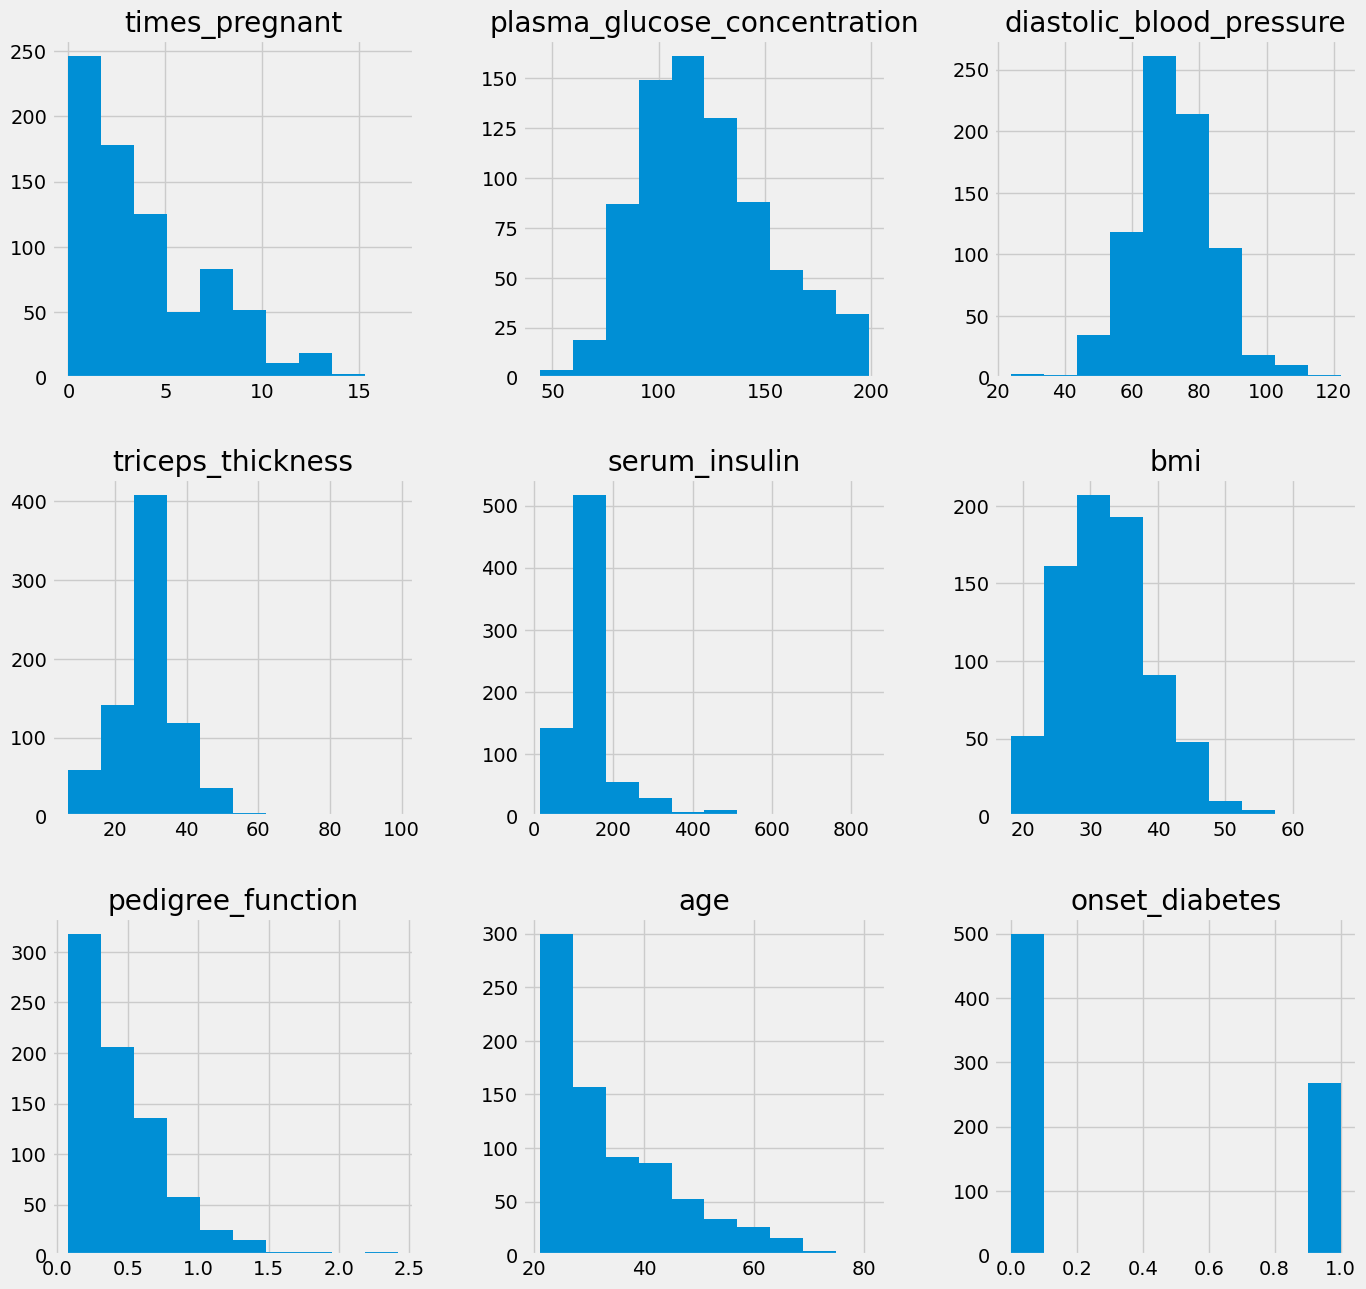

In [52]:
pima_imputed_mean.hist(figsize=(15, 15))

In [53]:
pima_imputed_mean.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<AxesSubplot: title={'center': 'times_pregnant'}>,
        <AxesSubplot: title={'center': 'plasma_glucose_concentration'}>,
        <AxesSubplot: title={'center': 'diastolic_blood_pressure'}>],
       [<AxesSubplot: title={'center': 'triceps_thickness'}>,
        <AxesSubplot: title={'center': 'serum_insulin'}>,
        <AxesSubplot: title={'center': 'bmi'}>],
       [<AxesSubplot: title={'center': 'pedigree_function'}>,
        <AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'onset_diabetes'}>]], dtype=object)

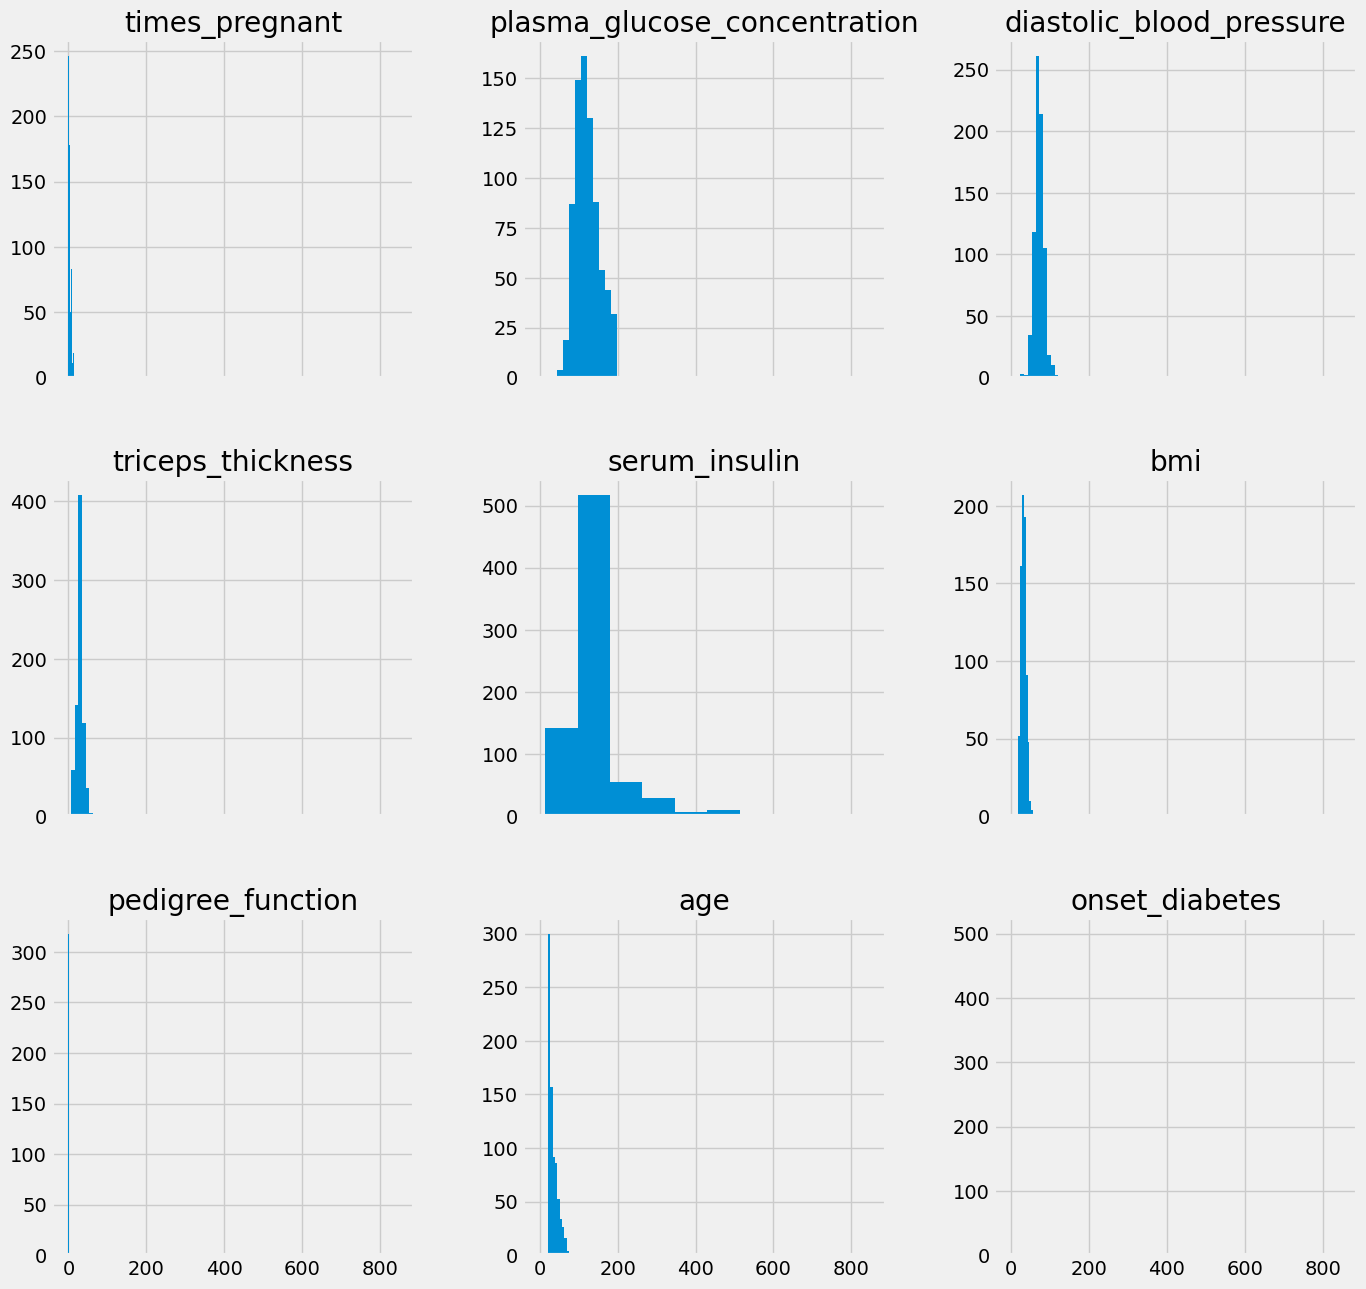

In [54]:
pima_imputed_mean.hist(figsize=(15, 15), sharex=True)
# With the same x axis (the y axis is not as important here)

### Z-score standardization

For every column, we replace the cells with the value: 
<code>z = (x - mu) / sigma</code>.
<code>mu</code> is the mean of the column, <code>sigma</code> is the standard deviation of the column.

In [55]:
# Manually compute
print(pima['plasma_glucose_concentration'].head())

# Get the mean of the column
mu = pima['plasma_glucose_concentration'].mean()

# Get the standard deviation of the column
sigma = pima['plasma_glucose_concentration'].std()

# Calculate z scores for every value in the column
print(((pima['plasma_glucose_concentration'] - mu) / sigma).head())

0    148.0
1     85.0
2    183.0
3     89.0
4    137.0
Name: plasma_glucose_concentration, Length: 5, dtype: float64
0    0.864545
1   -1.205376
2    2.014501
3   -1.073952
4    0.503130
Name: plasma_glucose_concentration, Length: 5, dtype: float64


In [56]:
# scikit-learn
from sklearn.preprocessing import StandardScaler

In [57]:
# mean and std before z score standardizing
pima['plasma_glucose_concentration'].mean(), pima['plasma_glucose_concentration'].std()

(121.68676277850591, 30.435948867207657)

Text(0.5, 1.0, 'Distribution of plasma_glucose_concentration')

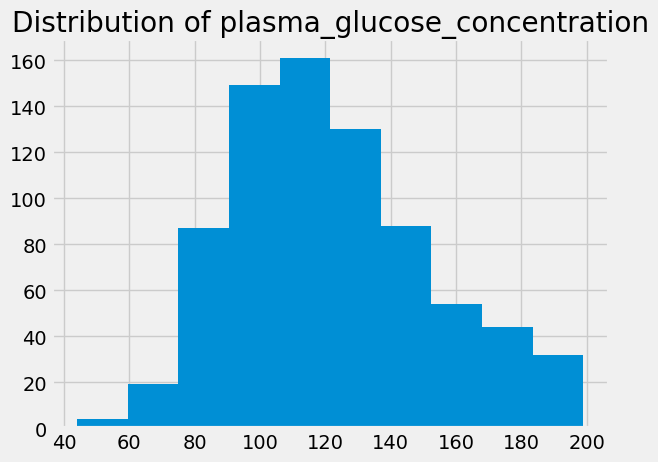

In [58]:
ax = pima['plasma_glucose_concentration'].hist()
ax.set_title('Distribution of plasma_glucose_concentration')

In [59]:
# StandardScaler() from scikit-learn
glucose_z_score_standardized = StandardScaler().fit_transform(pima[['plasma_glucose_concentration']])
# Note we use the double bracket notation [[ ]] because the transformer requires a dataframe

# Mean of 0 (floating point error) and standard deviation of 1
glucose_z_score_standardized.mean(), glucose_z_score_standardized.std()

(-3.561965537339044e-16, 1.0)

Text(0.5, 1.0, 'Distribution of plasma_glucose_concentration after Z Score Scaling')

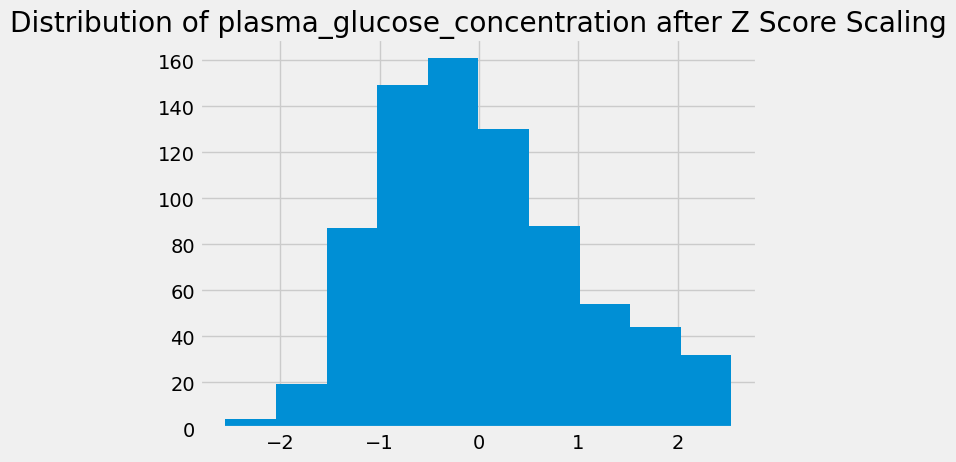

In [60]:
ax = pd.Series(glucose_z_score_standardized.reshape(-1,)).hist()
ax.set_title('Distribution of plasma_glucose_concentration after Z Score Scaling')

array([[<AxesSubplot: title={'center': 'times_pregnant'}>,
        <AxesSubplot: title={'center': 'plasma_glucose_concentration'}>,
        <AxesSubplot: title={'center': 'diastolic_blood_pressure'}>],
       [<AxesSubplot: title={'center': 'triceps_thickness'}>,
        <AxesSubplot: title={'center': 'serum_insulin'}>,
        <AxesSubplot: title={'center': 'bmi'}>],
       [<AxesSubplot: title={'center': 'pedigree_function'}>,
        <AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'onset_diabetes'}>]], dtype=object)

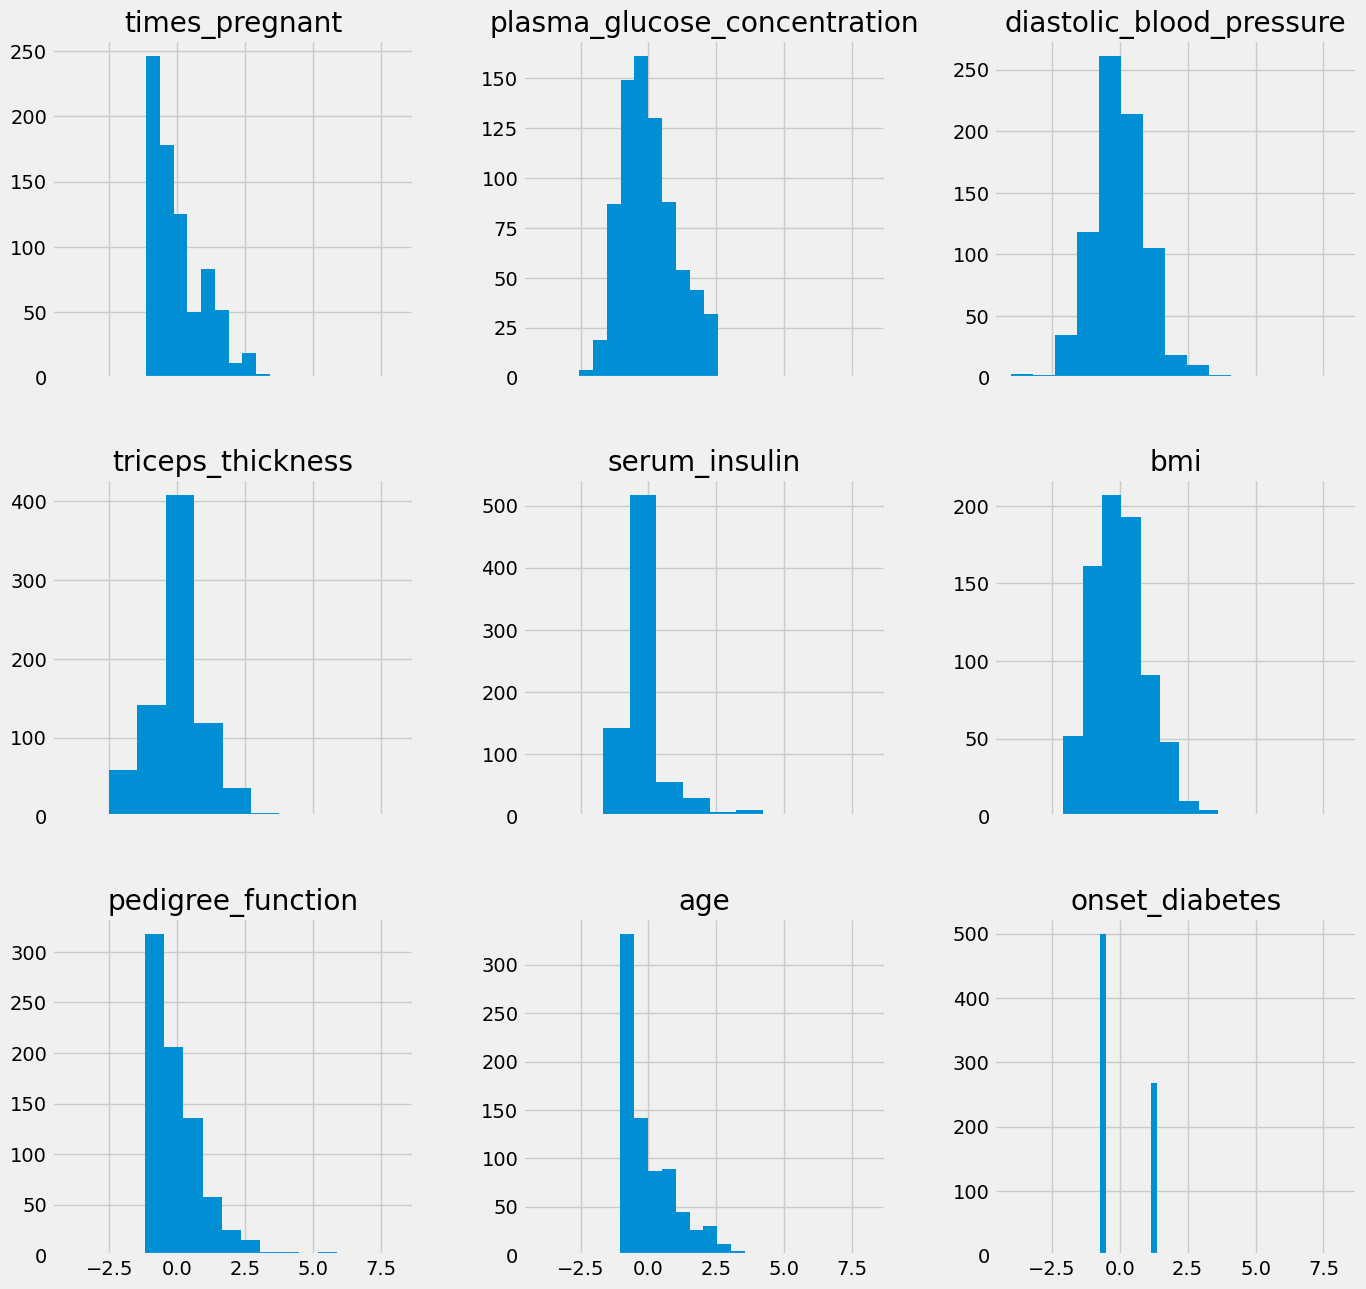

In [61]:
# Pipeline() including StandardScaler()
# Instantiate a z-scaler object
scale = StandardScaler()

pima_imputed_mean_scaled = pd.DataFrame(scale.fit_transform(pima_imputed_mean), columns=pima.columns)

# Now all share the same "space"
pima_imputed_mean_scaled.hist(figsize=(15, 15), sharex=True)

In [62]:
knn_params = {'imputer__strategy':['mean', 'median'], 'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

mean_impute_standardize = Pipeline([('imputer', SimpleImputer()), ('standardize', StandardScaler()), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

0.7539173245055598 {'classify__n_neighbors': 7, 'imputer__strategy': 'mean'}


### Min-max scaling

Replace every value in a column with a new value using the formula: <code>m = (x - x_min) / (x_max - x_min)</code>

In [63]:
# MinMaxScaler() from scikit-learn
from sklearn.preprocessing import MinMaxScaler

In [64]:
glucose_min_max_standardized = MinMaxScaler().fit_transform(pima[['plasma_glucose_concentration']])

# Doesn't guarantee a mean or standard deviation
glucose_min_max_standardized.mean(), glucose_min_max_standardized.std()

(0.5012049211516509, 0.19623307962522193)

Text(0.5, 1.0, 'Distribution of plasma_glucose_concentration after Min Max Scaling')

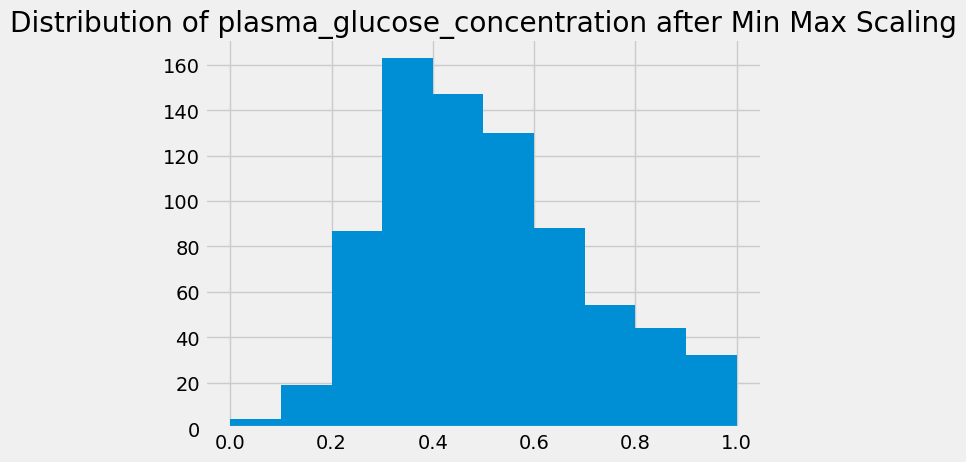

In [65]:
ax = pd.Series(glucose_min_max_standardized.reshape(-1,)).hist()
# Notice the shape never changes, but the values do
ax.set_title('Distribution of plasma_glucose_concentration after Min Max Scaling')

In [66]:
# Pipeline() including MinMaxScaler()
min_max = MinMaxScaler()

pima_min_maxed = pd.DataFrame(min_max.fit_transform(pima_imputed), columns=pima.columns)

In [67]:
pima_min_maxed.describe()

,times_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.501205,0.493930,0.240798,0.170130,0.291564,0.168179,0.204015,0.348958
std,0.198210,0.196361,0.123432,0.095554,0.102189,0.140596,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.359677,0.408163,0.195652,0.129207,0.190184,0.070773,0.050000,0.000000
50%,0.176471,0.470968,0.491863,0.240798,0.170130,0.290389,0.125747,0.133333,0.000000
75%,0.352941,0.620968,0.571429,0.271739,0.170130,0.376278,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
knn_params = {'imputer__strategy': ['mean', 'median'], 'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

mean_impute_standardize = Pipeline([('imputer', SimpleImputer()), ('standardize', MinMaxScaler()), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_standardize, knn_params)
grid.fit(X, y)

# This is the best accuracy we've gotten so far working with missing data
print(grid.best_score_, grid.best_params_)

0.7630336983278159 {'classify__n_neighbors': 7, 'imputer__strategy': 'median'}


### Row normalization

Ensure that each row of data has a <b>unit norm</b>, meaning that each row will be the same vector length.

In [69]:
from sklearn.preprocessing import Normalizer

In [70]:
# Pipeline() including Normalizer()
normalize = Normalizer()

pima_normalized = pd.DataFrame(normalize.fit_transform(pima_imputed), columns=pima.columns)

In [71]:
# Average vector length of row normalized imputed matrix
np.sqrt((pima_normalized**2).sum(axis=1)).mean()

1.0

In [72]:
knn_params = {'imputer__strategy': ['mean', 'median'], 'classify__n_neighbors':[1, 2, 3, 4, 5, 6, 7]}

mean_impute_normalize = Pipeline([('imputer', SimpleImputer()), ('normalize', Normalizer()), ('classify', knn)])
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes']

grid = GridSearchCV(mean_impute_normalize, knn_params)
grid.fit(X, y)

print(grid.best_score_, grid.best_params_)

0.7006111535523301 {'classify__n_neighbors': 7, 'imputer__strategy': 'median'}


There are many algorithms that are affected by the scale of data. Here is a list of some popular some popular learning algorithms that are affected by the scale of data:
1. <b>KNN</b> - due to ites reliance on the Euclidean Distance
2. <b>K-Means Clustering</b> - same reasoning as KNN
3. <b>Logistic regression</b>, <b>SVM</b>, <b>neural networks</b> - if you are using gradient descent to learn weights
4. <b>Principal component analysis</b> - eigen vectors will bee skewed towards larger columns